# Gedämpfter Harmonischer Oszillator mit schwacher Dämpfung

Die Bewegung eines gedämpften Pendels der Länge L im Gravitationsfeld der Erde lässt sich durch
die DGL zweiter Ordnung

\begin{equation}
\frac{d^2 \theta}{dt^2} + \gamma \frac{d\theta}{dt} + \frac{g}{L}\sin\theta = 0\tag{1}
\end{equation}

beschreiben, wobei $\theta$ der Auslenkungswinkel aus dem Ruhezustand und $\gamma$ die Dämpfung ist. Um die DGL zu lösen überführen wir sie in ein System gekoppelter DGLs erster Ordnung:

\begin{align}
\frac{d \theta}{dt} &= \omega \tag{2}\\
\frac{d \omega}{dt} &= - \gamma w - \frac{g}{L}\sin\theta.\tag{3}
\end{align}

Im folgenden sollen die DGLs numerisch mithilfe des Eulerverfahrens gelöst werden. Dazu werden die Ableitungen wie folgt diskretisiert:

\begin{align}
\frac{d \theta}{dt} &\approx \frac{\Delta \theta}{\Delta t} \tag{4}\\
\frac{d \omega}{dt} &\approx \frac{\Delta \omega}{\Delta t}.\tag{5}
\end{align}

Setzt man diese Näherungen der Ableitungen in (2) bzw. (3) ein, erhält man eine Approximation auf die Änderung von $\theta$ bzw. $\omega$, durch

\begin{align}
\theta(t+\Delta t) =&\ \theta(t) + \Delta\theta\tag{6}\\
\omega(t+\Delta t) =&\ \omega(t) + \Delta\omega\tag{7},
\end{align}

wobei $\Delta\theta$ und $\Delta\omega$ durch Umstellen der obigen Gleichungen bestimmt werden zu:

\begin{align}
\Delta \theta &= \omega \cdot\Delta t\tag{8}\\
\Delta \omega &= \left(- \gamma w - \frac{g}{L}\sin\theta \right)\cdot\Delta t\tag{9}
\end{align}

# 1. Sinus zur ersten nichtverschwindenen Ordnung entwickelt

In [1]:
# Hilfreiche Pakete
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
# TASK: Füge sinnvolle Konstanten ein
# TIPP: 'rumspielen' mit den Parametern kann für ein verbessertes Verständnis sorgen

g = 9.81
L = 1
gamma  = 1
phi0   = 1   # Bogenmaß
omega0 = 0.5   # Bogenmaß
# für zuverlässige Lösungen sollte der Zeitschritt relativ klein gewählt werden
dt     = 1e-4

In [3]:
# Test: Sind wir im Schwingfall?
#      --> Lässt sich an den gewählten Konstanten ablesen:
g/L - gamma**2/4

9.56

In [4]:
# TASK: Füge das Ergebnis der 1. Ordnung Taylorentwicklung des Sinus ein
# TIPP: Nicht zu kompliziert denken

def sin_1st_order(x):
    return x

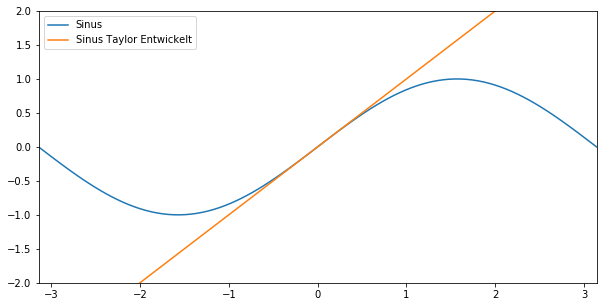

In [5]:
# Beim Programmieren ist es gute Praxis, sogenannte 'Sanity Checks' durchzuführen.
# Ziel ist es, sich zu überzeugen, dass bis jetzt alles gut läuft.
# Wenn die obige Funktion 'sin_1st_order' richtig eingefügt wurde sollte diese Zelle einen Plot eines Sinus
# sowie der Approximation erstellen

x = np.linspace(-np.pi,np.pi,100)
sin_all_order = np.sin(x)
sin_nth_order = sin_1st_order(x)
fig,ax =  plt.subplots(1,1,figsize=(10,5))
ax.plot(x,sin_all_order,label="Sinus")
ax.plot(x,sin_nth_order,label="Sinus Taylor Entwickelt")
ax.set_xlim(-np.pi,np.pi)
ax.set_ylim(-2,2)
ax.legend()
plt.show()

# HINWEIS: Dieser Plot soll nicht abgegeben werden

## Euler Algorithmus

In [6]:
# TASK: Füge eine maximale Zeit ein, bis zu der die Simulatin durchgeführt werden soll:
tmax = 5

In [7]:
# Diese Zelle führt das Euler-Verfahren bis zur oben eingestellten Zeit 'tmax' durch
# Dabei wird 'sin_1st_order' für die Approximation des Sinus genutzt
# phi(t), sowie omega(t) werden in zwei Listen gespeichert und können danach geplottet werden

phi_t   = [phi0]
omega_t = [omega0]

for _ in range(int(tmax // dt)):
    phi_t.append(phi_t[-1] + omega_t[-1] * dt)
    omega_t.append((1-gamma*dt) * omega_t[-1] - g/L*sin_1st_order(phi_t[-2])*dt)

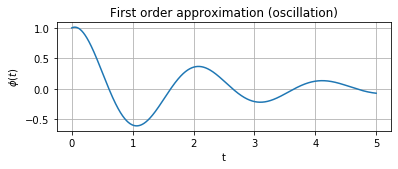

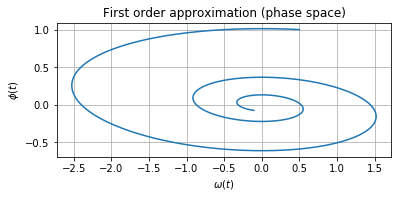

In [19]:
# TASK: Erstelle die geforderten Plots
# TIPP: Zum Erstellen mehrerer Plots auf einmal, siehe z.B.:
#      https://matplotlib.org/3.1.1/gallery/subplots_axes_and_figures/subplot.html


##plt.axes().set_aspect('equal')
t = np.arange(0, tmax, dt)

plt.axes().set_aspect('equal')
plt.grid(True)
plt.plot(t, phi_t)
plt.title('First order approximation (oscillation)')
plt.ylabel('$\phi(t)$')
plt.xlabel('t')
plt.show()

print('\n')

plt.axes().set_aspect('equal')
plt.grid(True)
plt.plot(omega_t, phi_t)
plt.title('First order approximation (phase space)')
plt.ylabel('$\phi(t)$')
plt.xlabel('$\omega(t)$')
plt.show()




# 2. Sinus zur zweiten nichtverschwindenen Ordnung entwickelt

In [9]:
# TASK: Füge die Taylorentwicklung des Sinus zur zweiten nicht verschwindenen Ordnung ein
# TIPP: Falkultäten lassen sich durch math.factorial(x) berechnen
# TIPP: Mit numpy arrays lässt sich bequem rechnen, die meisten Rechnungen werden Elementenweise ausgeführt

def sin_2nd_order(x):
    return x - (x**3)/6

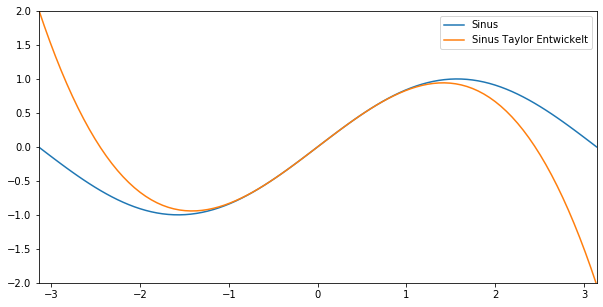

In [10]:
# Sanity Check

x = np.linspace(-np.pi,np.pi,100)
sin_all_order = np.sin(x)
sin_nth_order = sin_2nd_order(x)
fig,ax =  plt.subplots(1,1,figsize=(10,5))
ax.plot(x,sin_all_order,label="Sinus")
ax.plot(x,sin_nth_order,label="Sinus Taylor Entwickelt")
ax.set_xlim(-np.pi,np.pi)
ax.set_ylim(-2,2)
ax.legend()
plt.show()

# HINWEIS: Dieser Plot soll nicht abgegeben werden

## Euler Algorithmus

In [11]:
# Diese Zelle führt das Euler-Verfahren bis zur oben eingestellten Zeit 'tmax' durch
# Dabei wird 'sin_2nd_order' für die Approximation des Sinus genutzt
# phi(t), sowie omega(t) werden in zwei Listen gespeichert und können danach geplottet werden

phi_t_2nd   = [phi0]
omega_t_2nd = [omega0]

for _ in range(int(tmax // dt)):
    phi_t_2nd.append(phi_t_2nd[-1] + omega_t_2nd[-1] * dt)
    omega_t_2nd.append((1-gamma*dt) * omega_t_2nd[-1] - g/L*sin_2nd_order(phi_t_2nd[-2])*dt)
    
    

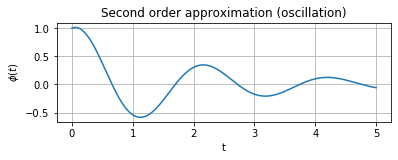

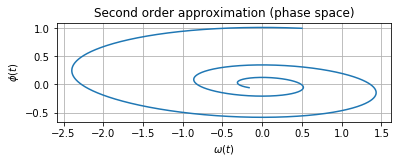

In [12]:
#TASK: Erstelle die geforderten Plots


plt.subplot(2, 1, 1)
plt.grid(True)
plt.plot(t, phi_t_2nd)
plt.title('Second order approximation (oscillation)')
plt.ylabel('$\phi(t)$')
plt.xlabel('t')
plt.show()

print('\n')

plt.subplot(2, 1, 2)
plt.grid(True)
plt.plot(omega_t_2nd, phi_t_2nd)
plt.title('Second order approximation (phase space)')
plt.ylabel('$\phi(t)$')
plt.xlabel('$\omega(t)$')
plt.show()

# 3. Differenz der Lösungen

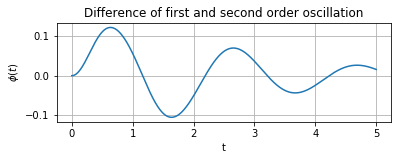

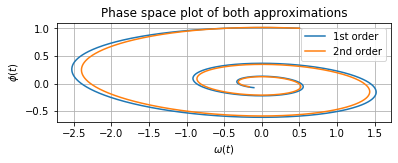

In [13]:
#TASK: Erstelle die geforderten Plots

dif = []

for i in range(len(phi_t)):
    dif.append(phi_t_2nd[i] - phi_t[i])

plt.subplot(2, 1, 1)
plt.grid(True)
plt.plot(t, dif)
plt.title('Difference of first and second order oscillation')
plt.ylabel('$\phi(t)$')
plt.xlabel('t')
plt.show()

print('\n')

plt.subplot(2, 1, 1)
plt.grid(True)
plt.plot(omega_t, phi_t, label = "1st order")
plt.plot(omega_t_2nd, phi_t_2nd, label = "2nd order")
plt.title('Phase space plot of both approximations')
plt.ylabel('$\phi(t)$')
plt.xlabel('$\omega(t)$')
plt.legend()
plt.show()

Text(0.5, 1.0, 'First order approximation (oscillation)')

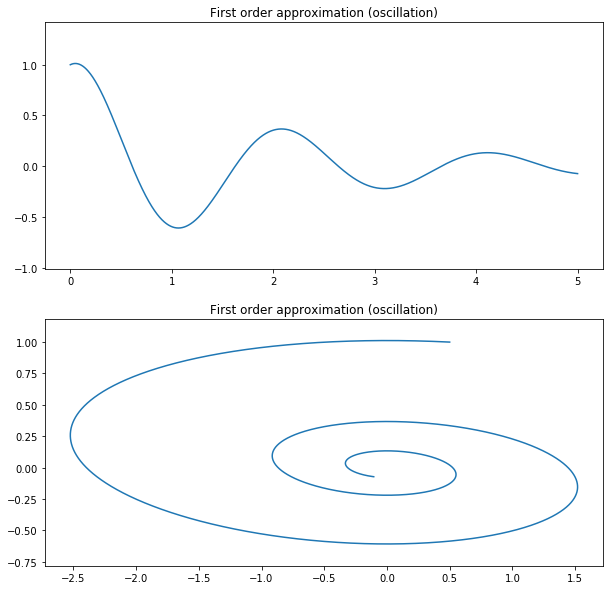

In [40]:
# TASK: Erstelle die geforderten Plots
# TIPP: Zum Erstellen mehrerer Plots auf einmal, siehe z.B.:
#      https://matplotlib.org/3.1.1/gallery/subplots_axes_and_figures/subplot.html


##plt.axes().set_aspect('equal')
t = np.arange(0, tmax, dt)
fig, axs = plt.subplots(2, 1, figsize = (10,10))
an = np.linspace(0, 2 * np.pi, 100)

axs[0].plot(t, phi_t)
axs[0].axis('equal')
axs[0].set_title('First order approximation (oscillation)')


axs[1].plot(omega_t, phi_t)
axs[1].axis('equal')
axs[1].set_title('First order approximation (oscillation)')


